In [1]:
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import FreqDist, ngrams
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import pandas as pd

nltk.download('punkt')
nltk.download('vader_lexicon')



[nltk_data] Downloading package punkt to /home/dzakirm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dzakirm/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_parquet("../data/interim/arxiv-abstracts-cleaned.parquet")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       50000 non-null  object
 1   authors                  50000 non-null  object
 2   title                    50000 non-null  object
 3   abstract                 50000 non-null  object
 4   title_clean              50000 non-null  object
 5   title_tokens             50000 non-null  object
 6   title_tokens_no_stop     50000 non-null  object
 7   title_lemmatized         50000 non-null  object
 8   title_stemmed            50000 non-null  object
 9   title_entities           50000 non-null  object
 10  title_pos_tags           50000 non-null  object
 11  abstract_clean           50000 non-null  object
 12  abstract_tokens          50000 non-null  object
 13  abstract_tokens_no_stop  50000 non-null  object
 14  abstract_lemmatized      50000 non-nul

## Title Analysis

In [3]:
# -------------------------------
# Frequency Analysis
# -------------------------------
# Compute word frequencies across the entire dataset
all_tokens = [token for tokens in df['title_lemmatized'] for token in tokens]
word_freq = FreqDist(all_tokens)
print("Top 10 words:")
print(word_freq.most_common(10))


Top 10 words:
[('model', 3542), ('quantum', 2603), ('system', 2068), ('theory', 1770), ('network', 1746), ('field', 1645), ('use', 1631), ('equation', 1405), ('effect', 1279), ('dynamic', 1234)]


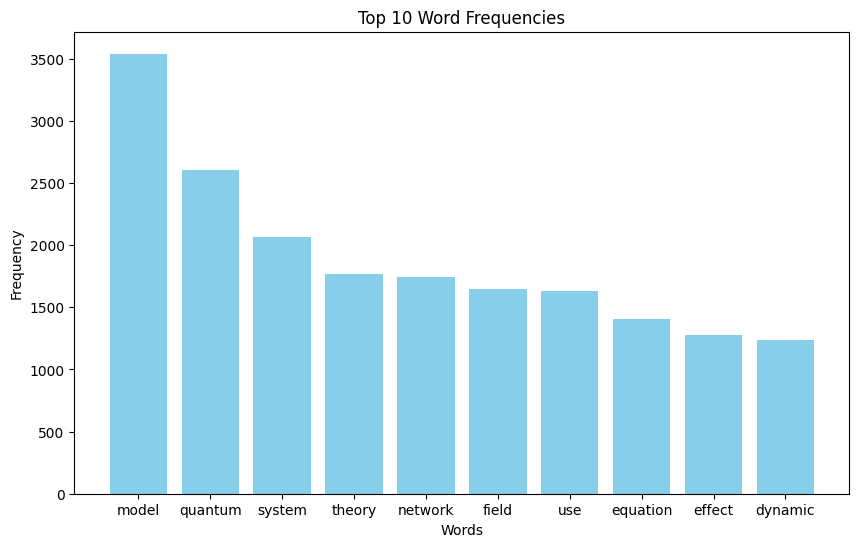

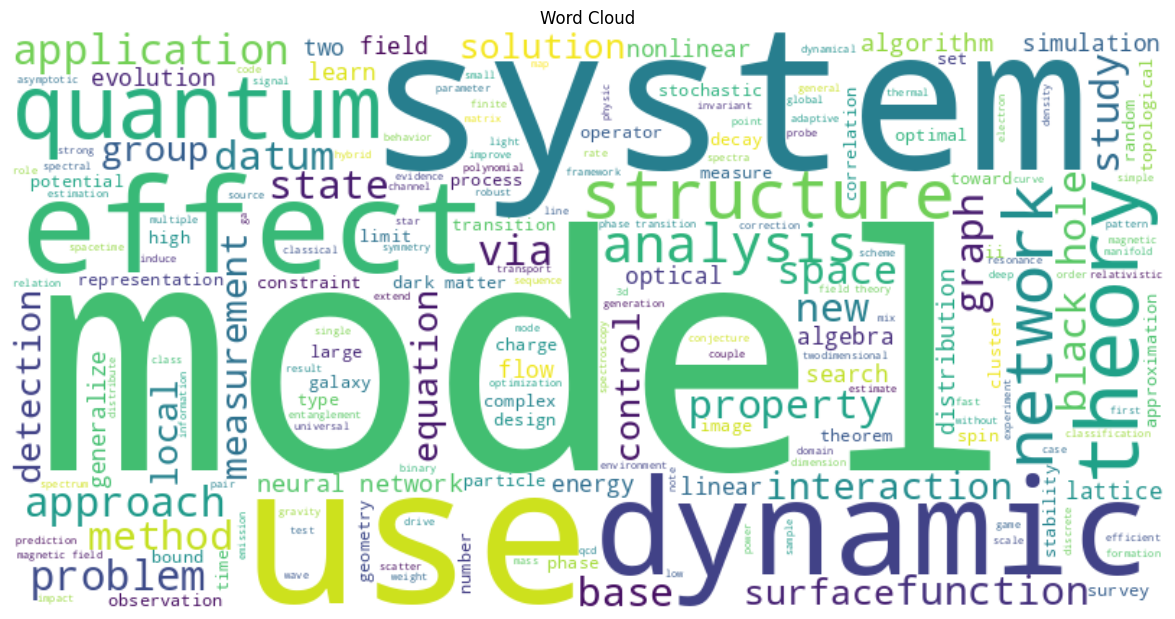

Top 10 bigrams:
[(('black', 'hole'), 593), (('neural', 'network'), 468), (('dark', 'matter'), 377), (('magnetic', 'field'), 293), (('phase', 'transition'), 278), (('field', 'theory'), 275), (('gauge', 'theory'), 162), (('neutron', 'star'), 154), (('monte', 'carlo'), 147), (('quantum', 'dot'), 145)]


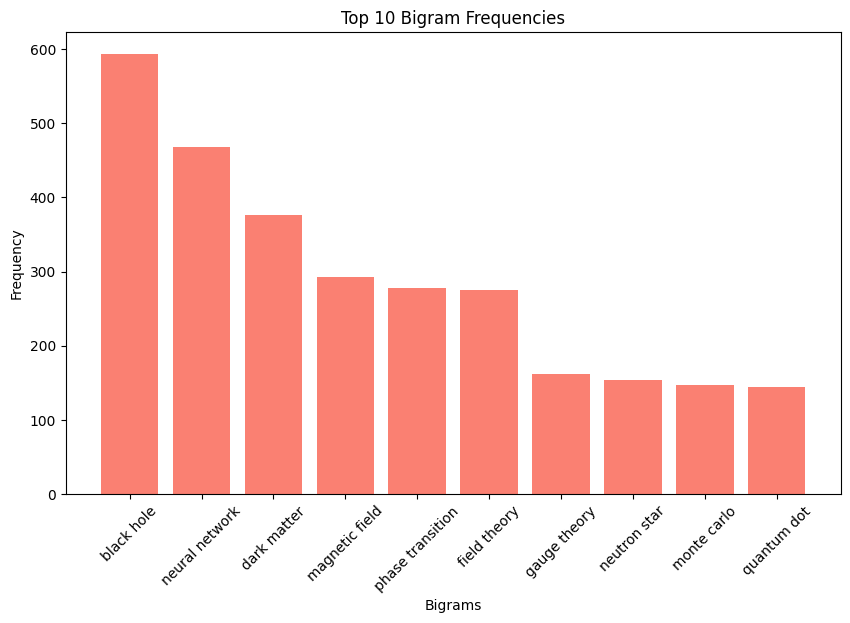

Top 10 trigrams:
[(('convolutional', 'neural', 'network'), 91), (('deep', 'neural', 'network'), 76), (('quantum', 'field', 'theory'), 67), (('deep', 'reinforcement', 'learning'), 52), (('effective', 'field', 'theory'), 50), (('nonlinear', 'schroding', 'equation'), 39), (('finite', 'element', 'method'), 37), (('stochastic', 'differential', 'equation'), 37), (('quantum', 'phase', 'transition'), 36), (('quantum', 'hall', 'effect'), 36)]


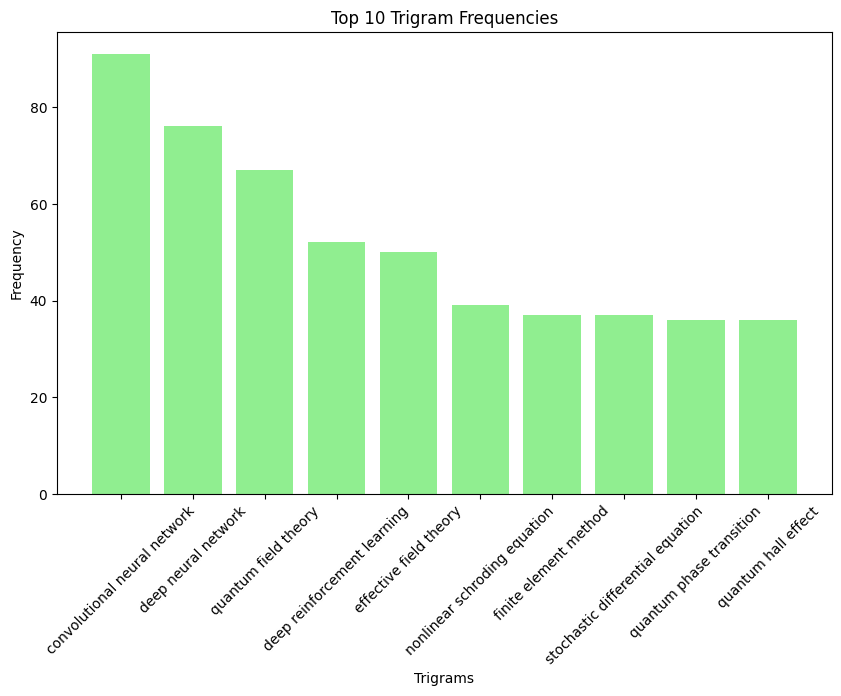

In [5]:
# Plot Top 10 Word Frequencies
words, counts = zip(*word_freq.most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_tokens))
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

# N‑gram Frequency Analysis (Bigrams & Trigrams)
bigrams = list(ngrams(all_tokens, 2))
bigram_freq = FreqDist(bigrams)
print("Top 10 bigrams:")
print(bigram_freq.most_common(10))

bigram_words = [" ".join(bigram) for bigram, count in bigram_freq.most_common(10)]
bigram_counts = [count for bigram, count in bigram_freq.most_common(10)]
plt.figure(figsize=(10, 6))
plt.bar(bigram_words, bigram_counts, color='salmon')
plt.title("Top 10 Bigram Frequencies")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

trigrams = list(ngrams(all_tokens, 3))
trigram_freq = FreqDist(trigrams)
print("Top 10 trigrams:")
print(trigram_freq.most_common(10))

trigram_words = [" ".join(trigram) for trigram, count in trigram_freq.most_common(10)]
trigram_counts = [count for trigram, count in trigram_freq.most_common(10)]
plt.figure(figsize=(10, 6))
plt.bar(trigram_words, trigram_counts, color='lightgreen')
plt.title("Top 10 Trigram Frequencies")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## Abstract

In [6]:
# -------------------------------
# Frequency Analysis
# -------------------------------
# Compute word frequencies across the entire dataset
all_tokens = [token for tokens in df['abstract_lemmatized'] for token in tokens]
word_freq = FreqDist(all_tokens)
print("Top 10 words:")
print(word_freq.most_common(10))

Top 10 words:
[('model', 32756), ('use', 29922), ('show', 23713), ('result', 23027), ('system', 18518), ('study', 16946), ('method', 16114), ('also', 14967), ('field', 14928), ('two', 13899)]


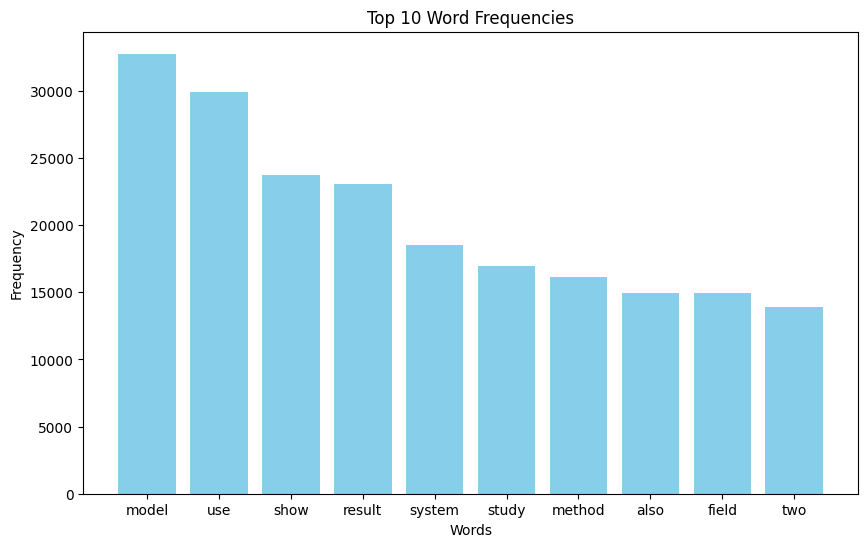

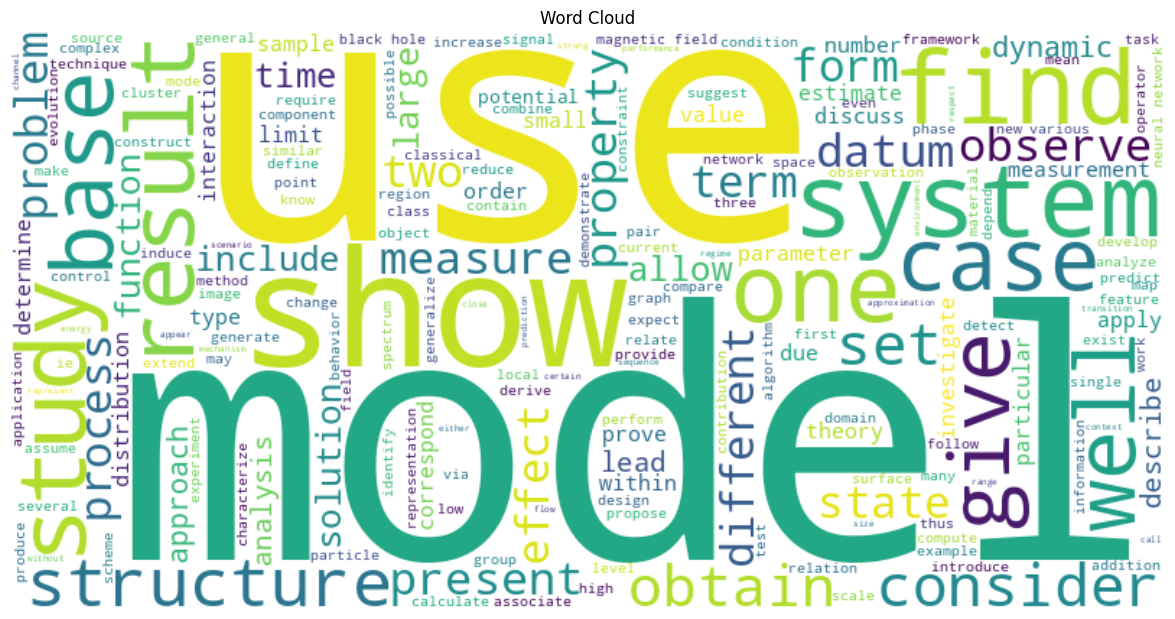

Top 10 bigrams:
[(('magnetic', 'field'), 2928), (('black', 'hole'), 2477), (('neural', 'network'), 2032), (('dark', 'matter'), 1580), (('result', 'show'), 1404), (('et', 'al'), 1398), (('phase', 'transition'), 1337), (('allow', 'we'), 1292), (('field', 'theory'), 1255), (('paper', 'present'), 1116)]


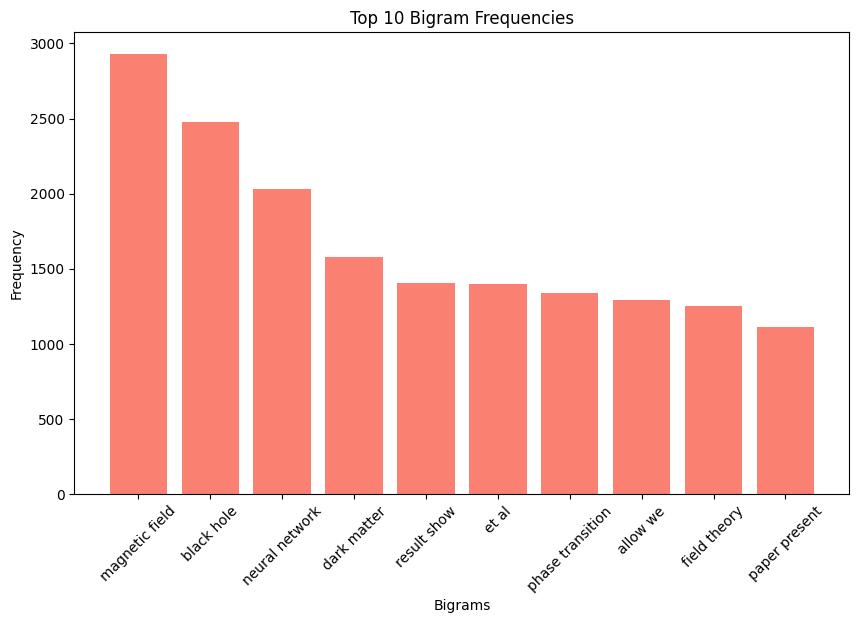

Top 10 trigrams:
[(('convolutional', 'neural', 'network'), 419), (('deep', 'neural', 'network'), 385), (('play', 'important', 'role'), 323), (('monte', 'carlo', 'simulation'), 294), (('quantum', 'field', 'theory'), 259), (('density', 'functional', 'theory'), 259), (('star', 'formation', 'rate'), 231), (('cosmic', 'microwave', 'background'), 225), (('experimental', 'result', 'show'), 223), (('partial', 'differential', 'equation'), 207)]


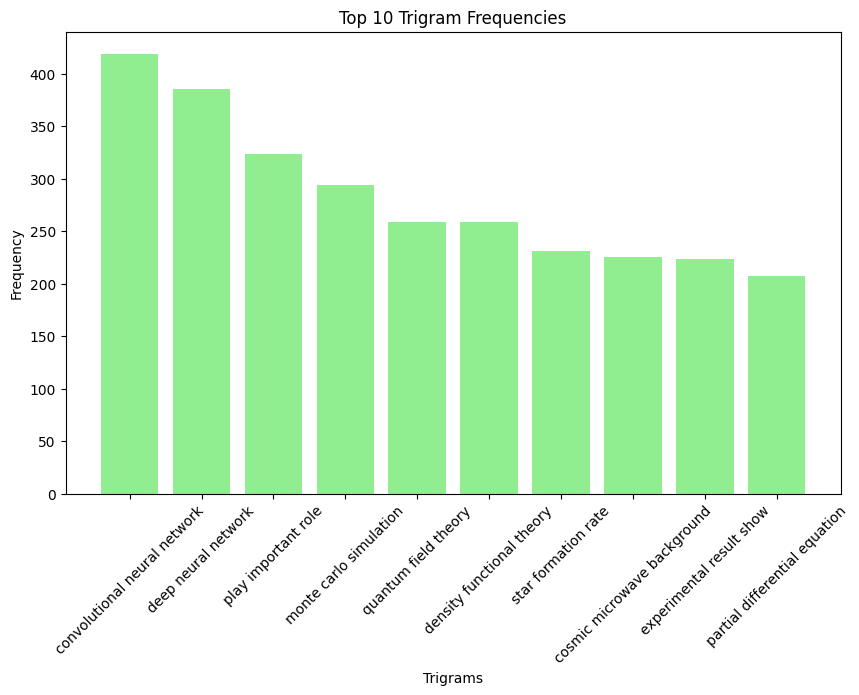

In [7]:

# Plot Top 10 Word Frequencies
words, counts = zip(*word_freq.most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_tokens))
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

# N‑gram Frequency Analysis (Bigrams & Trigrams)
bigrams = list(ngrams(all_tokens, 2))
bigram_freq = FreqDist(bigrams)
print("Top 10 bigrams:")
print(bigram_freq.most_common(10))

bigram_words = [" ".join(bigram) for bigram, count in bigram_freq.most_common(10)]
bigram_counts = [count for bigram, count in bigram_freq.most_common(10)]
plt.figure(figsize=(10, 6))
plt.bar(bigram_words, bigram_counts, color='salmon')
plt.title("Top 10 Bigram Frequencies")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

trigrams = list(ngrams(all_tokens, 3))
trigram_freq = FreqDist(trigrams)
print("Top 10 trigrams:")
print(trigram_freq.most_common(10))

trigram_words = [" ".join(trigram) for trigram, count in trigram_freq.most_common(10)]
trigram_counts = [count for trigram, count in trigram_freq.most_common(10)]
plt.figure(figsize=(10, 6))
plt.bar(trigram_words, trigram_counts, color='lightgreen')
plt.title("Top 10 Trigram Frequencies")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


# Topic Modeling

In [10]:
# -------------------------------
# Topic Modeling with Gensim LDA
# -------------------------------
documents = df['abstract_lemmatized'].tolist()
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Build LDA model (adjust num_topics and passes as needed)
lda_model = gensim.models.LdaModel(corpus, num_topics=6, id2word=dictionary, passes=20)
topics = lda_model.print_topics(num_words=5)
print("LDA Topics:")
for topic in topics:
    print(topic)


LDA Topics:
(0, '0.012*"group" + 0.011*"give" + 0.010*"prove" + 0.010*"space" + 0.010*"show"')
(1, '0.009*"magnetic" + 0.009*"state" + 0.009*"phase" + 0.008*"temperature" + 0.007*"field"')
(2, '0.014*"model" + 0.011*"energy" + 0.009*"mass" + 0.007*"matter" + 0.007*"decay"')
(3, '0.013*"equation" + 0.012*"theory" + 0.011*"model" + 0.010*"quantum" + 0.010*"system"')
(4, '0.011*"star" + 0.010*"galaxy" + 0.007*"find" + 0.006*"cluster" + 0.006*"mass"')
(5, '0.012*"model" + 0.011*"use" + 0.009*"method" + 0.008*"propose" + 0.008*"network"')


In [11]:
# -------------------------------
# LDA Visualization with pyLDAvis
# -------------------------------
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')
print("LDA visualization saved as 'lda_visualization.html'.")


LDA visualization saved as 'lda_visualization.html'.
